In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 9.43MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
!ls

 CA_category_id.json		      JPvideos.csv
 carprices.csv			      kaggle.json
 CAvideos.csv			      KR_category_id.json
 DE_category_id.json		      KRvideos.csv
 DEvideos.csv			      loan_data_set.csv
 FR_category_id.json		      Mall_Customers.csv
 FRvideos.csv			      MX_category_id.json
 GB_category_id.json		      MXvideos.csv
 GBvideos.csv			      RU_category_id.json
 healthcare-dataset-stroke-data.csv   RUvideos.csv
 homeprices2.csv		      StudentsPerformance.csv
 homeprices.csv			      test_catvnoncat.h5
 IN_category_id.json		      train_catvnoncat.h5
 insurance.csv			      US_category_id.json
 INvideos.csv			      USvideos.csv
 JP_category_id.json		     'Womens Clothing E-Commerce Reviews.csv'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Preprocessing

In [ ]:
#droping id column
df.drop('id',axis=1,inplace=True)

In [ ]:
#renaming Residence_type column to residence_type
df.rename(columns={'Residence_type':'residence_type'},inplace=True)

In [ ]:
#filling null value of bmi column with mean of bmi column
df.fillna(df.bmi.mean(),inplace=True)

In [ ]:
#one hot encoding on categorical variable
for column in df.columns:
    if column not in df._get_numeric_data().columns:
        temp=pd.get_dummies(df[column])
        df=pd.concat([df,temp],axis=1)
        df.drop(column,axis=1,inplace=True)

In [ ]:
from collections import Counter
counter=Counter(df.stroke)

In [ ]:
counter

Counter({1: 249, 0: 4861})

<AxesSubplot:xlabel='stroke', ylabel='count'>

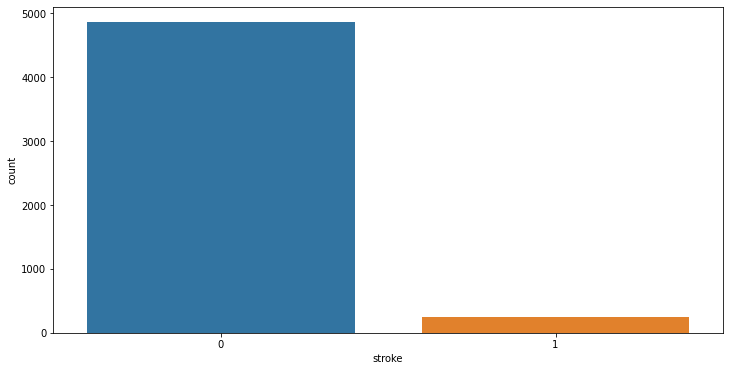

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="stroke", data=df)

In [ ]:
#seprating stroke and without stroke data for plotting
df1=df[df['stroke']==1]
df2=df[df['stroke']==0]

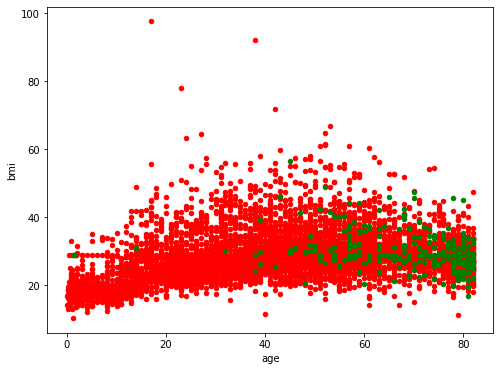

In [ ]:
ax1 = df2.plot(kind='scatter', x='age', y='bmi', color='r')    
ax2 = df1.plot(kind='scatter', x='age', y='bmi', color='g', ax=ax1,figsize=(8,6))    

In [ ]:
y=df.stroke
X=df.drop('stroke',axis=1)

In [ ]:
#Oversampling to tackle class imbalance problem
from imblearn.over_sampling import SMOTE

smt = SMOTE()


smt_x,smt_y=smt.fit_resample(X,y)

In [ ]:
over_sample_data=pd.concat([smt_x,smt_y],axis=1)

<AxesSubplot:xlabel='stroke', ylabel='count'>

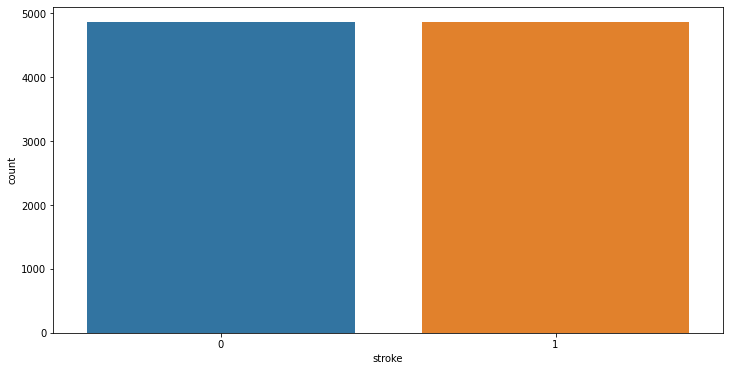

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="stroke", data=over_sample_data)

In [ ]:
df1=over_sample_data[over_sample_data['stroke']==1]
df2=over_sample_data[over_sample_data['stroke']==0]

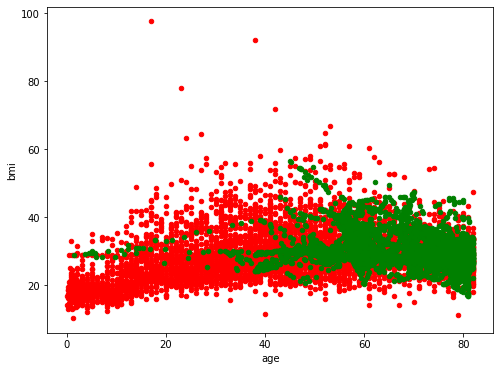

In [ ]:
ax1 = df2.plot(kind='scatter', x='age', y='bmi', color='r')    
ax2 = df1.plot(kind='scatter', x='age', y='bmi', color='g', ax=ax1,figsize=(8,6))    


<AxesSubplot:>

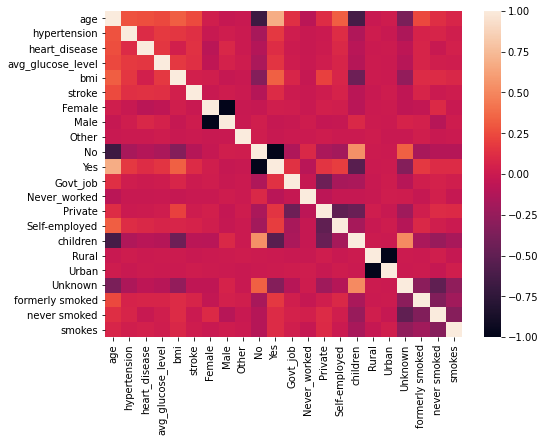

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

<AxesSubplot:>

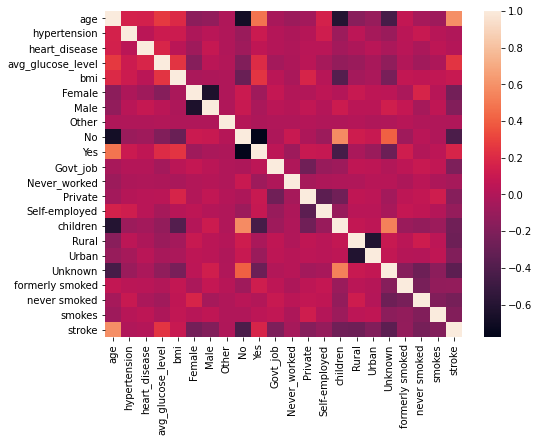

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(over_sample_data.corr())

c:\users\nomesh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

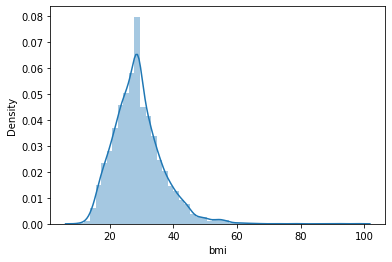

In [ ]:
sns.distplot(df.bmi)

c:\users\nomesh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

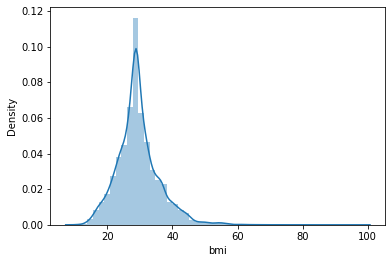

In [ ]:
sns.distplot(over_sample_data.bmi)

In [ ]:
#Spliting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.30, random_state=3)

In [ ]:
#Feature scaling/ Standarizing the data
X_train = pd.DataFrame(scale(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scale(X_test),columns=X_test.columns)

# Modelling

In [ ]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy of logistic regression classifier on train set: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

[[1448    5]
 [ 118 1346]]
Accuracy of logistic regression classifier on train set: 0.9630
Accuracy of logistic regression classifier on test set: 0.9578


In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Accuracy of random forest classifier on train set: {:.4f}'.format(svclassifier.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(svclassifier.score(X_test, y_test)))

[[1322  131]
 [ 156 1308]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1453
           1       0.91      0.89      0.90      1464

    accuracy                           0.90      2917
   macro avg       0.90      0.90      0.90      2917
weighted avg       0.90      0.90      0.90      2917

Accuracy of random forest classifier on train set: 0.8995
Accuracy of random forest classifier on test set: 0.9016


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print('Accuracy of random forest classifier on train set: {:.4f}'.format(svclassifier.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(svclassifier.score(X_test, y_test)))

[[1452    1]
 [ 119 1345]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1453
           1       1.00      0.92      0.96      1464

    accuracy                           0.96      2917
   macro avg       0.96      0.96      0.96      2917
weighted avg       0.96      0.96      0.96      2917

Accuracy of random forest classifier on train set: 0.9627
Accuracy of random forest classifier on test set: 0.9589


In [ ]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy of decision tree classifier on train set: {:.4f}'.format(dtree.score(X_train, y_train)))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

[[1359   94]
 [  76 1388]]
Accuracy of decision tree classifier on train set: 1.0000
Accuracy of decision tree classifier on test set: 0.9417


In [ ]:
train={}
test={}
for i in range(1,20):
    randomForest= RandomForestClassifier(n_estimators=i)
    randomForest.fit(X_train, y_train)
    y_pred = randomForest.predict(X_test)
    train[i]=randomForest.score(X_train, y_train)
    test[i]=randomForest.score(X_test, y_test)

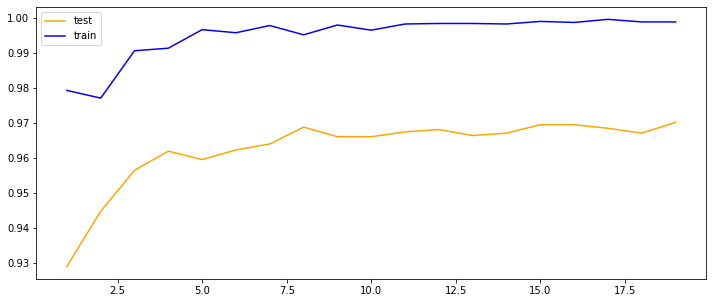

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(list(test.keys()),list(test.values()),color='orange', label='test')
plt.plot(list(train.keys()),list(train.values()),color='blue', label='train')
plt.legend()

In [ ]:
randomForest= RandomForestClassifier(n_estimators=8)
randomForest.fit(X_train, y_train)
print(randomForest.score(X_train,y_train))
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print('Accuracy of random forest classifier on train set: {:.4f}'.format(randomForest.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

0.9960323291697282
Confusion matrix
 [[1426   27]
 [  75 1389]]
Accuracy of random forest classifier on train set: 0.9960
Accuracy of random forest classifier on test set: 0.9650


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(8, 4), random_state=1,max_iter=1500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print('Accuracy of random forest classifier on train set: {:.4f}'.format(clf.score(X_train, y_train)))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(clf.score(X_test, y_test)))

Confusion matrix
 [[1427   26]
 [  92 1372]]
Accuracy of random forest classifier on train set: 0.9724
Accuracy of random forest classifier on test set: 0.9595
